<H1>COMP4531 Deep Learning Mid-Term</H1>

In this project, we will be developing a basic neural network from the ground up to classify various types of fashion items. The primary objective of this project is to gain a comprehensive understanding of neural network architecture, including its theory and implementation details.

<H2>Part 0: Initialization</H2>

To start, let's load some packages and the dataset

In [1]:
# Notice that you don't need any other packages for this mid-term

import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt

random.seed(42) # NEVER change this line; this is for grading

In [2]:
labels = {
    0 : "T-shirt/top",
    1 : "Trouser",
    2 : "Pullover",
    3 : "Dress",
    4 : "Coat",
    5 : "Sandal",
    6 : "Shirt",
    7 : "Sneaker", 
    8 : "Bag", 
    9 : "Ankle boot"
}

In [3]:
# Reading the dataset
data = pd.read_csv('./fashion_data.csv')

In [4]:
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V776,V777,V778,V779,V780,V781,V782,V783,V784,y
0,0,0,0,0,0,1,3,2,0,0,...,0,0,135,117,25,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,11,...,0,0,0,147,162,104,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,20,3,0,0,0,0,0,0,0,3
3,0,0,0,0,0,0,0,0,0,0,...,229,215,175,145,5,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1997,0,0,0,0,0,0,0,0,0,0,...,197,195,3,0,3,0,0,0,0,3
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,180,247,210,0,0,0,0,4


In [5]:
# The data pre-processing is done for you. Please do NOT edit the cell
# However, you should understand what these codes are doing

data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:400].T
Y_dev = data_dev[-1]
X_dev = data_dev[0:n-1]
X_dev = X_dev / 255.

data_train = data[400:m].T
Y_train = data_train[-1]
X_train = data_train[0:n-1]
X_train = X_train / 255.
_,m_train = X_train.shape

In [6]:
Y_train.shape

(1600,)

In [7]:
Y_train[2]

6

In [8]:
X_dev.shape

(784, 400)

In [9]:
X_train.shape

(784, 1600)

In [10]:
print(m,n)

2000 785


<H2>Part 1: Building your own neural network</H2>

In [11]:
# define a global variable specifying the number of hidden neurons after the first layer
# not the best practice, but we will do it for this mid-term project
num_hidden_neurons = 20

This is the main part of the mid-term. You **must not** change the definition of the function. In fact, the comments are going to help you go through the implementation and they are all you need

<H3>1.1 Initialize the parameter in the neural network</H3>

In [12]:
# Initialize the parameters in the neural network

# Based on the figure above, we need the weight and bias matrices. 
# W1, b1 are the matrices for the first layer
# W2, b2 are the matrices for the second layer

# You should think about the sizes of the matrices
# then initialize elements in the matrix to be random numbers between -0.5 to +0.5
n_classes = np.unique(Y_train).shape[0]
def init_params():
    # Layer one will receive the inputs of the data with the hidden neurons, so the size must be the number of hidden neurons x the number of inputs
    W1 = np.random.rand(num_hidden_neurons, X_train.shape[0]) - 0.5
    b1 = np.random.rand(num_hidden_neurons, 1) - 0.5
    # Layer two will take the result of the previous layer and output it to one of the possible output classes
    W2 = np.random.rand(num_hidden_neurons, n_classes) - 0.5
    b2 = np.random.rand(n_classes, 1) - 0.5
    return W1, b1, W2, b2

<H3>1.2 Implement the non-linearity functions and its derivatives</H3>

In [13]:
# As a starting point, you only need a ReLu function, its derivative, and the softmax function 

# ReLU (Rectified Linear Unit)
# Piecewise activation function. It basically cuts off any nevative values and turns them to 0, and if it is positive, it returns the original value
def ReLU(x): 
    return np.maximum(0,x)
    
# ReLU derivative
# As it name describes, it is the derivative of the ReLU function
def ReLU_deriv(Z):
    return Z > 0

def softmax(Z):
    return np.exp(Z) / sum(np.exp(Z))

<H3>1.3 Implement the forward propagation function</H3>

In [14]:
# In the forward propagation function, X is the inputs (the image in vector form), and we pass all the weights and biases

def forward_prop(W1, b1, W2, b2, X):
    # Multiplies the inputs by the weights, then adds the bias
    Z1 = W1.dot(X) + b1
    # The output of the previous step is passed through the activation function. In this case, ReLU
    A1 = ReLU(Z1)
    # In the test dataset
    # The output of the first layer is multiplied by the second layer and the bias is added
    Z2 = W2.T.dot(A1) + b2
    # Finally, the output of the previous step is passed through the softmax function to get the best candidate for the prediction
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

<H3>1.4 Implement the backward propagation function</H3>

In [15]:
Y_train.dot(Y_train.T)

46637

In [16]:
# This one hot function is to convert a numeric number into a one-hot vector
def one_hot(Y):
    # A zero array is created with size (number of samples in Y, all possible classes in Y)
    one_hot_Y = np.zeros((Y.size, len(np.unique(Y))))
    # This array then is set to one on the value of the sample
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y.T

# Now performing the backward propagation
# Each function is only one line, but lots of Calculus behind 
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    # Calculate the difference between the output and the predicted output
    dZ2 = A2 - Y
    # Calculate dW2 with dZ2 and the output of the first layer, which is the input of the second layer
    dW2 = dZ2.dot(A1.T) / m
    # db2 is calculated simply with the sum of dZ2 over m ,as is the average of the gradients of the loss function
    db2 = np.sum(dZ2) / m
    # dZ1 is calculated with the weights of the second layer and dZ2, times Z1 which has to go through the derivative of the activation function, 
    #which in this case, it is the RELU 
    dZ1 = W2.dot(dZ2) * ReLU_deriv(Z1)
    # Finally, dW1 is calculated with dZ1 dot the input, over m
    dW1 = dZ1.dot(X.T) / m
    # db1 is calculated with the sum of dZ1 over m
    db1 = np.sum(dZ1) / m
    return dW1, db1, dW2, db2

# Finally, we are ready to update the parameters
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    # All the parameters are updated with the learning rate and their respective differentials
    W1 -= alpha * dW1
    b1 -= alpha * db1    
    W2 -= (alpha*dW2).T
    b2 -= alpha * db2    
    return W1, b1, W2, b2

<H3>1.5 Performing the gradient descent</H3>

In [17]:
# Implement the helper function. We need to convert the softmax output into a numeric label 
# This is done through get_predictions function
def get_predictions(A2):
    # Get the best candidate for the output
    return np.argmax(A2, 0)

# We also want to have a simple function to compute the accuracy. Notice that "predictions" and "Y" are the same shape
def get_accuracy(predictions, Y):
    # The accuracy is calculated with the number of correctly predicted elements over the total of input elements
    return np.sum(predictions == Y) / Y.size

# Finally, we are ready to implement gradient descent
def gradient_descent(X, Y, alpha, iterations):
    # The parameters are initialized
    W1, b1, W2, b2 = init_params()
    # One hot vector of the output is obtained
    one_hot_Y = one_hot(Y)
    previous_accuracy = 0
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, one_hot_Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        # Every 10 epochs, we show the progress of the training
        if i % 10 == 0:
            print("Epoch: {}".format(i))
            new_accuracy = get_accuracy(get_predictions(A2), Y)
            print("Accuracy: {}".format(new_accuracy))
            print("Improvement: {}".format(new_accuracy - previous_accuracy))
            if previous_accuracy > new_accuracy:
                #break # Early stoppage if the accuracy goes down
                pass # Removed because with higher numbers of iterations, the accuracy fluctuates
            previous_accuracy = new_accuracy
    return W1, b1, W2, b2

In [18]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 1000)

Epoch: 0
Accuracy: 0.08625
Improvement: 0.08625
Epoch: 10
Accuracy: 0.36625
Improvement: 0.28
Epoch: 20
Accuracy: 0.4975
Improvement: 0.13124999999999998
Epoch: 30
Accuracy: 0.566875
Improvement: 0.06937500000000002
Epoch: 40
Accuracy: 0.605625
Improvement: 0.03874999999999995
Epoch: 50
Accuracy: 0.623125
Improvement: 0.01750000000000007
Epoch: 60
Accuracy: 0.64
Improvement: 0.016874999999999973
Epoch: 70
Accuracy: 0.650625
Improvement: 0.010624999999999996
Epoch: 80
Accuracy: 0.663125
Improvement: 0.012499999999999956
Epoch: 90
Accuracy: 0.673125
Improvement: 0.010000000000000009
Epoch: 100
Accuracy: 0.6875
Improvement: 0.014375000000000027
Epoch: 110
Accuracy: 0.6925
Improvement: 0.0050000000000000044
Epoch: 120
Accuracy: 0.700625
Improvement: 0.008125000000000049
Epoch: 130
Accuracy: 0.70875
Improvement: 0.008124999999999938
Epoch: 140
Accuracy: 0.718125
Improvement: 0.009375000000000022
Epoch: 150
Accuracy: 0.726875
Improvement: 0.008750000000000036
Epoch: 160
Accuracy: 0.7325
Impr

<H3>1.6 Validation Set Performance</H3>

In [19]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    return get_predictions(A2)

In [20]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

0.76

<H3>1.7 Exploring some samples</H3>

Prediction: Pullover
Label: Pullover


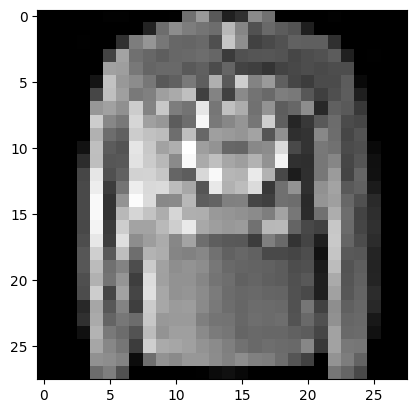

Prediction: Bag
Label: Bag


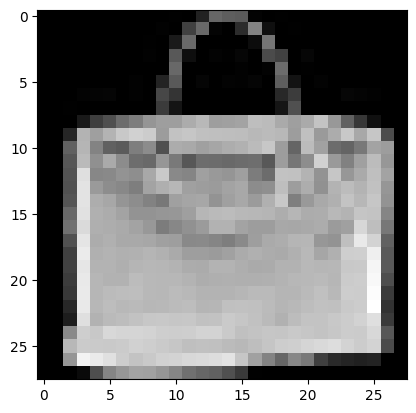

Prediction: Coat
Label: Shirt


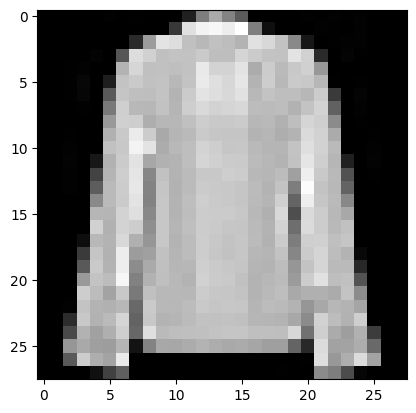

Prediction: Pullover
Label: Shirt


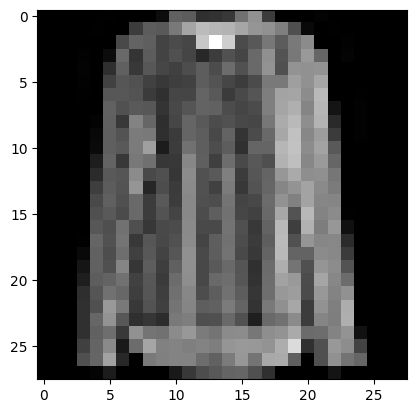

In [21]:
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    
    print("Prediction: {}".format(labels[prediction[0]]))
    print("Label: {}".format(labels[label]))
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()
    
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(50, W1, b1, W2, b2)

<H2>Part 2: Error Analysis and Performance Improvements</H2>

Based on the neural network, you should recommend some next steps in this part. Some ideas include investigating where the model fails to predict and/or trying to improve the model performance through, for example, different activation functions, expanding the network complexity.

**It is crucial to provide reasoning behind what you do, or else no credit will be given.**

In [22]:
res = []
for i in range(X_train.shape[1]):
    res.append(make_predictions(X_train[:, i, None], W1, b1, W2, b2)[0])
outputs = pd.DataFrame(data = [Y_train, res])
outputs = outputs.T
outputs.columns = ["Y", "predicted"]
failed = outputs[outputs["Y"] != outputs["predicted"]]

In [23]:
def show_failed(index):
    current_image = X_train[:, index, None]
    label = Y_train[index]
    print("Prediction: {}".format(labels[failed["predicted"][index]]))
    print("Label: {}".format(labels[label]))
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction: Coat
Label: Shirt


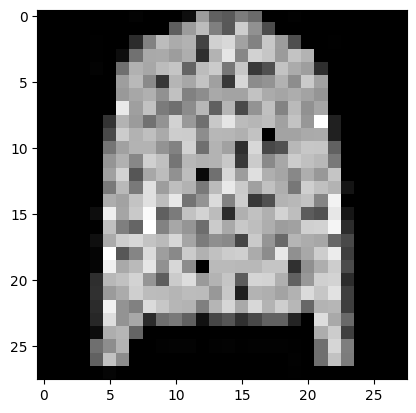

Prediction: Pullover
Label: Shirt


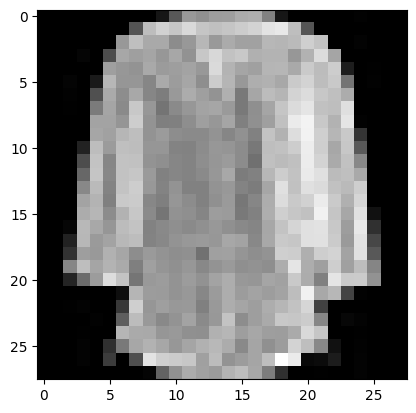

Prediction: Shirt
Label: Bag


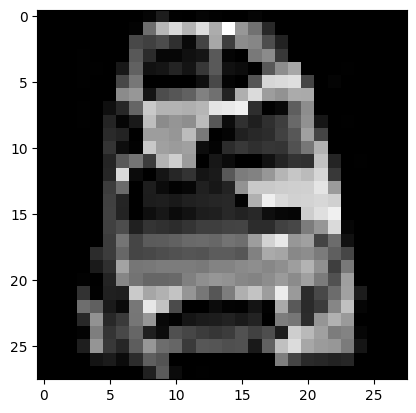

Prediction: Pullover
Label: Shirt


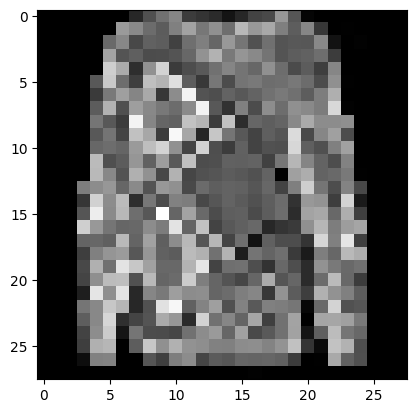

Prediction: Dress
Label: Shirt


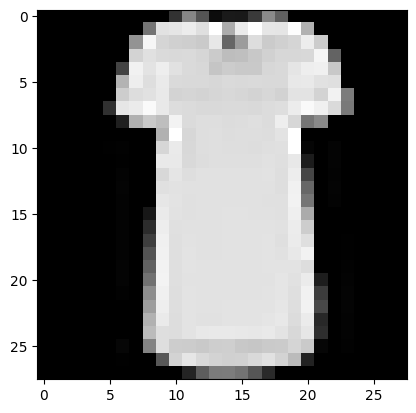

Prediction: Bag
Label: Shirt


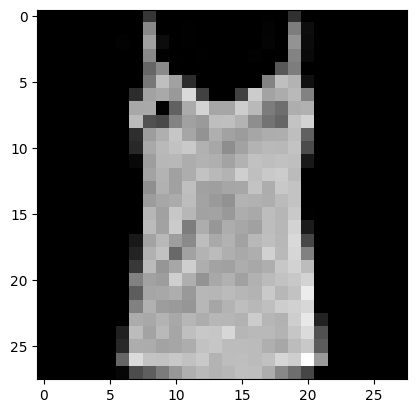

Prediction: Coat
Label: Dress


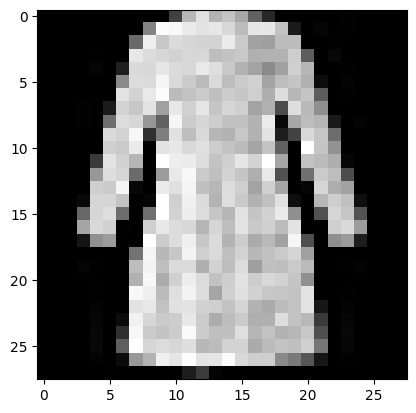

Prediction: Coat
Label: Shirt


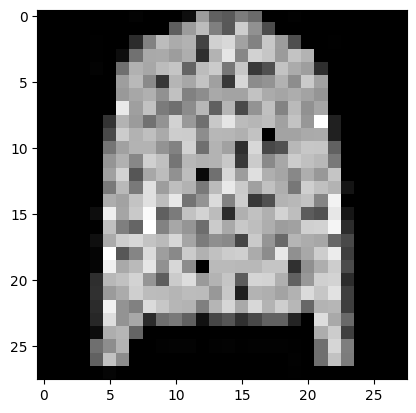

Prediction: T-shirt/top
Label: Shirt


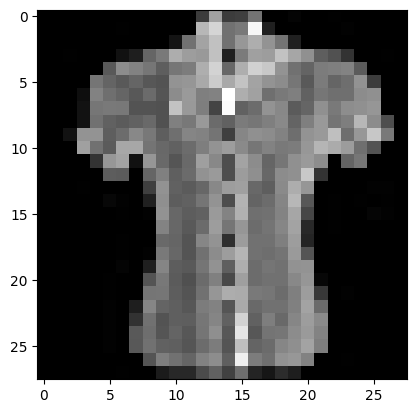

Prediction: Trouser
Label: Pullover


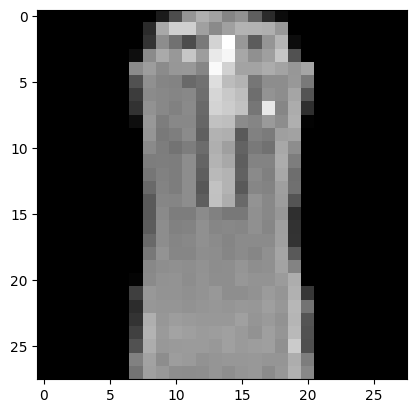

In [24]:
for i in range(10):
    index = failed.index.values[np.random.randint(low = 0, high = failed.shape[0])]
    show_failed(index)

It can be seen that most of the mistakes made by the network are on similaro objects, such as pullovers and shirts, coats, t-shirts, etc. 
Some dresses with sleeves are also confused as shirts. 
Other group that causes issues is sneakers and ankle boots. 
Perhaps if we had 3 more columns for RGB, the model could learn the common colors for certain objects to better predict the objects. 

*Better / higher quality input images*: Some of the categories are very similar to each other, such as shirts, T-shirts, coats, and pullovers. 
A higher quality image might help differentiate between them. Another example of this is short-sleeved shirts, which on the image quality we have, look like regular shirts.   
*Increasing the number of hidden layers*: By increasing the number of hidden layers, the connections in the neurons could be more complex, which may make the model more flexible, allowing it to differentiate between similar objects  
*Different activation functions*: ReLU, although not linear, is a relative simple activation function. With more complex activation functions, the model could increase complexity, which might improve the accuracy. However, I tried using a TANH activation function, but the accuracy did not improve. Other activation functions may improve the performance. 

## Changing Activation functions

In [25]:
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1-np.tanh(x)**2

In [26]:
# In the forward propagation function, X is the inputs (the image in vector form), and we pass all the weights and biases

def forward_prop(W1, b1, W2, b2, X):
    # Multiplies the inputs by the weights, then adds the bias
    Z1 = W1.dot(X) + b1
    A1 = tanh(Z1) # I tried improving the performance by using tanh, but the accuracy only improved in the training dataset, but it remained the same
    # In the test dataset
    # The output of the first layer is multiplied by the second layer and the bias is added
    Z2 = W2.T.dot(A1) + b2
    # Finally, the output of the previous step is passed through the softmax function to get the best candidate for the prediction
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    # Calculate the difference between the output and the predicted output
    dZ2 = A2 - Y
    # Calculate dW2 with dZ2 and the output of the first layer, which is the input of the second layer
    dW2 = dZ2.dot(A1.T) / m
    # db2 is calculated simply with the sum of dZ2 over m
    db2 = np.sum(dZ2) / m
    # dZ1 is calculated with the weights of the second layer and dZ2, times Z1 which has to go through the derivative of the activation function, 
    #which in this case, it is the RELU 
    dZ1 = W2.dot(dZ2) * tanh_derivative(Z1)
    # Finally, dW1 is calculated with dZ1 dot the input, over m
    dW1 = dZ1.dot(X.T) / m
    # db1 is calculated with the sum of dZ1 over m
    db1 = np.sum(dZ1) / m
    return dW1, db1, dW2, db2

In [27]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 1000)

Epoch: 0
Accuracy: 0.084375
Improvement: 0.084375
Epoch: 10
Accuracy: 0.240625
Improvement: 0.15625
Epoch: 20
Accuracy: 0.369375
Improvement: 0.12875
Epoch: 30
Accuracy: 0.451875
Improvement: 0.08250000000000002
Epoch: 40
Accuracy: 0.495625
Improvement: 0.043749999999999956
Epoch: 50
Accuracy: 0.535625
Improvement: 0.040000000000000036
Epoch: 60
Accuracy: 0.569375
Improvement: 0.03374999999999995
Epoch: 70
Accuracy: 0.5925
Improvement: 0.023125000000000062
Epoch: 80
Accuracy: 0.60875
Improvement: 0.016249999999999987
Epoch: 90
Accuracy: 0.625625
Improvement: 0.016874999999999973
Epoch: 100
Accuracy: 0.640625
Improvement: 0.015000000000000013
Epoch: 110
Accuracy: 0.659375
Improvement: 0.018750000000000044
Epoch: 120
Accuracy: 0.673125
Improvement: 0.013749999999999929
Epoch: 130
Accuracy: 0.68375
Improvement: 0.010624999999999996
Epoch: 140
Accuracy: 0.69
Improvement: 0.006249999999999978
Epoch: 150
Accuracy: 0.6975
Improvement: 0.007500000000000062
Epoch: 160
Accuracy: 0.70375
Improvem

In [28]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

0.7325

Prediction: Shirt
Label: Pullover


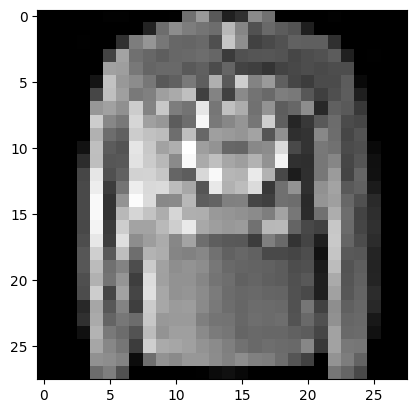

Prediction: Bag
Label: Bag


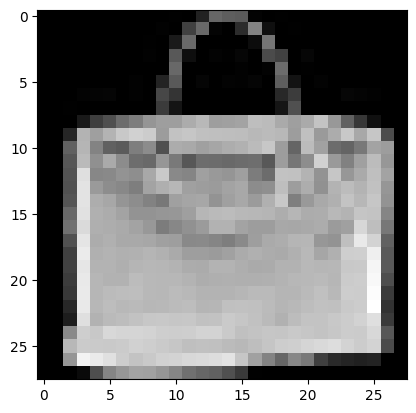

Prediction: Coat
Label: Shirt


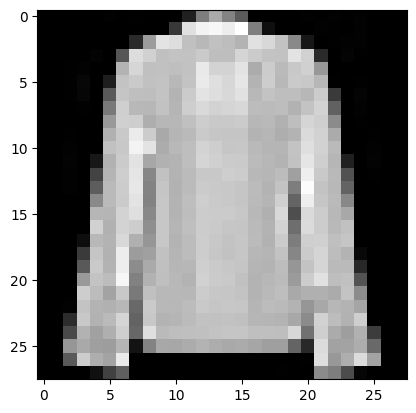

Prediction: Pullover
Label: Shirt


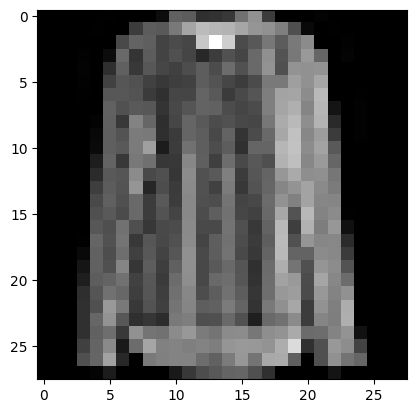

In [29]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(50, W1, b1, W2, b2)

Unfortunately, it can be seen that after changing the activation function the accuracy of the model did not improve.  


## Increasing number of neurons

By increasing the number of neurons, the possible number of connections increases, allowing a higher complexity in the model, which may be able to create better predictions. 

In [30]:
num_hidden_neurons = 100

In [31]:
# We use the ReLU again, as changing one thing at a time would provide a clearer picture of what each change is doing
def forward_prop(W1, b1, W2, b2, X):
    # Multiplies the inputs by the weights, then adds the bias
    Z1 = W1.dot(X) + b1
    # The output of the previous step is passed through the activation function. In this case, ReLU
    A1 = ReLU(Z1)
    # In the test dataset
    # The output of the first layer is multiplied by the second layer and the bias is added
    Z2 = W2.T.dot(A1) + b2
    # Finally, the output of the previous step is passed through the softmax function to get the best candidate for the prediction
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    # Calculate the difference between the output and the predicted output
    dZ2 = A2 - Y
    # Calculate dW2 with dZ2 and the output of the first layer, which is the input of the second layer
    dW2 = dZ2.dot(A1.T) / m
    # db2 is calculated simply with the sum of dZ2 over m
    db2 = np.sum(dZ2) / m
    # dZ1 is calculated with the weights of the second layer and dZ2, times Z1 which has to go through the derivative of the activation function, 
    #which in this case, it is the RELU 
    dZ1 = W2.dot(dZ2) * ReLU_deriv(Z1)
    # Finally, dW1 is calculated with dZ1 dot the input, over m
    dW1 = dZ1.dot(X.T) / m
    # db1 is calculated with the sum of dZ1 over m
    db1 = np.sum(dZ1) / m
    return dW1, db1, dW2, db2

In [32]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 1000)

Epoch: 0
Accuracy: 0.078125
Improvement: 0.078125
Epoch: 10
Accuracy: 0.50625
Improvement: 0.428125
Epoch: 20
Accuracy: 0.601875
Improvement: 0.09562500000000007
Epoch: 30
Accuracy: 0.645625
Improvement: 0.043749999999999956
Epoch: 40
Accuracy: 0.679375
Improvement: 0.03374999999999995
Epoch: 50
Accuracy: 0.700625
Improvement: 0.021250000000000102
Epoch: 60
Accuracy: 0.7175
Improvement: 0.016874999999999973
Epoch: 70
Accuracy: 0.73625
Improvement: 0.018749999999999933
Epoch: 80
Accuracy: 0.7525
Improvement: 0.016249999999999987
Epoch: 90
Accuracy: 0.766875
Improvement: 0.014375000000000027
Epoch: 100
Accuracy: 0.77625
Improvement: 0.009375000000000022
Epoch: 110
Accuracy: 0.783125
Improvement: 0.0068749999999999645
Epoch: 120
Accuracy: 0.790625
Improvement: 0.007500000000000062
Epoch: 130
Accuracy: 0.794375
Improvement: 0.003750000000000031
Epoch: 140
Accuracy: 0.795
Improvement: 0.0006249999999999867
Epoch: 150
Accuracy: 0.80625
Improvement: 0.011249999999999982
Epoch: 160
Accuracy: 0

In [33]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

0.7625

In [34]:
num_hidden_neurons = 1000
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 1000)

Epoch: 0
Accuracy: 0.0575
Improvement: 0.0575
Epoch: 10
Accuracy: 0.56625
Improvement: 0.50875
Epoch: 20
Accuracy: 0.626875
Improvement: 0.06062499999999993
Epoch: 30
Accuracy: 0.659375
Improvement: 0.032500000000000084
Epoch: 40
Accuracy: 0.68125
Improvement: 0.021874999999999978
Epoch: 50
Accuracy: 0.7025
Improvement: 0.02124999999999999
Epoch: 60
Accuracy: 0.721875
Improvement: 0.01937500000000003
Epoch: 70
Accuracy: 0.73125
Improvement: 0.009374999999999911
Epoch: 80
Accuracy: 0.74625
Improvement: 0.015000000000000013
Epoch: 90
Accuracy: 0.75875
Improvement: 0.012500000000000067
Epoch: 100
Accuracy: 0.773125
Improvement: 0.014374999999999916
Epoch: 110
Accuracy: 0.785
Improvement: 0.01187500000000008
Epoch: 120
Accuracy: 0.7925
Improvement: 0.007499999999999951
Epoch: 130
Accuracy: 0.8
Improvement: 0.007500000000000062
Epoch: 140
Accuracy: 0.81
Improvement: 0.010000000000000009
Epoch: 150
Accuracy: 0.82375
Improvement: 0.013749999999999929
Epoch: 160
Accuracy: 0.833125
Improvement:

In [35]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

0.7775

It can be seen that increasing the number of neurons increases the accuracy, but the higher the number of neurons, the lower the increase.  
Therefore, having a large increase in accuracy would require a very large number of neurons, which would slow down the training. I tried training a NN with 5000 neurons, and it took a long time and had memory issues.  
Another possible issue would be over complicating the model, causing overfitting. 

## Changing learning rates
Changing the learning rate may change the behavior of the model, but not necessarily improve its performance.  
However, it can be tested. 

In [44]:
learning_rates = [0.1, 0.3, 0.5, 0.7, 0.9, 1]
accuracies = []
num_hidden_neurons = 20
for alfa in learning_rates:
    print("Learning rate: {}".format(alfa))
    W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.5, 1000)
    dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
    accuracies.append(get_accuracy(dev_predictions, Y_dev))
print(accuracies)

Learning rate: 0.1
Epoch: 0
Accuracy: 0.165625
Improvement: 0.165625
Epoch: 10
Accuracy: 0.51375
Improvement: 0.348125
Epoch: 20
Accuracy: 0.6275
Improvement: 0.1137499999999999
Epoch: 30
Accuracy: 0.6775
Improvement: 0.050000000000000044
Epoch: 40
Accuracy: 0.715
Improvement: 0.03749999999999998
Epoch: 50
Accuracy: 0.735625
Improvement: 0.020625000000000004
Epoch: 60
Accuracy: 0.7575
Improvement: 0.021874999999999978
Epoch: 70
Accuracy: 0.775
Improvement: 0.01750000000000007
Epoch: 80
Accuracy: 0.788125
Improvement: 0.013124999999999942
Epoch: 90
Accuracy: 0.79625
Improvement: 0.008125000000000049
Epoch: 100
Accuracy: 0.8025
Improvement: 0.006249999999999978
Epoch: 110
Accuracy: 0.806875
Improvement: 0.004375000000000018
Epoch: 120
Accuracy: 0.81
Improvement: 0.0031250000000000444
Epoch: 130
Accuracy: 0.81875
Improvement: 0.008749999999999925
Epoch: 140
Accuracy: 0.823125
Improvement: 0.004375000000000018
Epoch: 150
Accuracy: 0.82625
Improvement: 0.0031250000000000444
Epoch: 160
Accur

It can be seen that the best accuracy with ReLU and 20 neurons was reached using a learning rate of 0.7.  
However, it is not consistent, as the accuracy goes up and down. 

## Putting them together

There was an accuracy increase when the activation function was changed to TanH, and an accuracy increase when the number of neurons increased.  
By combining these two changes, the new model could benefit from them both. 

In [40]:
# In the forward propagation function, X is the inputs (the image in vector form), and we pass all the weights and biases

def forward_prop(W1, b1, W2, b2, X):
    # Multiplies the inputs by the weights, then adds the bias
    Z1 = W1.dot(X) + b1
    A1 = tanh(Z1) # I tried improving the performance by using tanh, but the accuracy only improved in the training dataset, but it remained the same
    # In the test dataset
    # The output of the first layer is multiplied by the second layer and the bias is added
    Z2 = W2.T.dot(A1) + b2
    # Finally, the output of the previous step is passed through the softmax function to get the best candidate for the prediction
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    # Calculate the difference between the output and the predicted output
    dZ2 = A2 - Y
    # Calculate dW2 with dZ2 and the output of the first layer, which is the input of the second layer
    dW2 = dZ2.dot(A1.T) / m
    # db2 is calculated simply with the sum of dZ2 over m
    db2 = np.sum(dZ2) / m
    # dZ1 is calculated with the weights of the second layer and dZ2, times Z1 which has to go through the derivative of the activation function, 
    #which in this case, it is the RELU 
    dZ1 = W2.dot(dZ2) * tanh_derivative(Z1)
    # Finally, dW1 is calculated with dZ1 dot the input, over m
    dW1 = dZ1.dot(X.T) / m
    # db1 is calculated with the sum of dZ1 over m
    db1 = np.sum(dZ1) / m
    return dW1, db1, dW2, db2

In [45]:
num_hidden_neurons = 1000
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.70, 1000)

Epoch: 0
Accuracy: 0.168125
Improvement: 0.168125
Epoch: 10
Accuracy: 0.134375
Improvement: -0.03375
Epoch: 20
Accuracy: 0.42625
Improvement: 0.291875
Epoch: 30
Accuracy: 0.424375
Improvement: -0.0018750000000000155
Epoch: 40
Accuracy: 0.626875
Improvement: 0.20249999999999996
Epoch: 50
Accuracy: 0.6375
Improvement: 0.010624999999999996
Epoch: 60
Accuracy: 0.715625
Improvement: 0.078125
Epoch: 70
Accuracy: 0.80125
Improvement: 0.08562500000000006
Epoch: 80
Accuracy: 0.6775
Improvement: -0.12375000000000003
Epoch: 90
Accuracy: 0.745
Improvement: 0.0675
Epoch: 100
Accuracy: 0.72
Improvement: -0.025000000000000022
Epoch: 110
Accuracy: 0.720625
Improvement: 0.0006249999999999867
Epoch: 120
Accuracy: 0.815625
Improvement: 0.09500000000000008
Epoch: 130
Accuracy: 0.7275
Improvement: -0.08812500000000001
Epoch: 140
Accuracy: 0.769375
Improvement: 0.041874999999999996
Epoch: 150
Accuracy: 0.863125
Improvement: 0.09375
Epoch: 160
Accuracy: 0.773125
Improvement: -0.09000000000000008
Epoch: 170
A

In [46]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

0.805

It can be observed that the NN quickly became overfitted to the training data, as the accuracy for the training dataset became almost 100%, while the accuracy for the test dataset remained almost unchanged.  
However, there is an improvement in the accuracy. For now, the biggest issue is the overfitting, which could be solved by training the NN again using different sets for X and Y.

In [51]:
def gradient_descent(X, Y, alpha, iterations, W1 = None, b1 = None, W2 = None, b2 = None):
    # The parameters are initialized
    if W1 is not None:
        W1 = W1
        W2 = W2
        b1 = b1
        b2 = b2
    else:
        W1, b1, W2, b2 = init_params()
        
    # One hot vector of the output is obtained
    one_hot_Y = one_hot(Y)
    previous_accuracy = 0
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, one_hot_Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        # Every 10 epochs, we show the progress of the training
        if i % 10 == 0:
            print("Epoch: {}".format(i))
            new_accuracy = get_accuracy(get_predictions(A2), Y)
            print("Accuracy: {}".format(new_accuracy))
            print("Improvement: {}".format(new_accuracy - previous_accuracy))
            if previous_accuracy > new_accuracy:
                #break # Early stoppage if the accuracy goes down
                pass # Removed because with higher numbers of iterations, the accuracy fluctuates
            previous_accuracy = new_accuracy
    return W1, b1, W2, b2

In [ ]:
# Careful when executing this cell, as it takes some time to fully execute
num_hidden_neurons = 1000
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.70, 1000)
for i in range(10):
    np.random.shuffle(data) # shuffle before splitting into dev and training sets
    
    data_dev = data[0:400].T
    Y_dev = data_dev[-1]
    X_dev = data_dev[0:n-1]
    X_dev = X_dev / 255.
    
    data_train = data[400:m].T
    Y_train = data_train[-1]
    X_train = data_train[0:n-1]
    X_train = X_train / 255.
    W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.70, 1000, W1, b1, W2, b2)

In [53]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

1.0

Prediction: Sandal
Label: Sandal


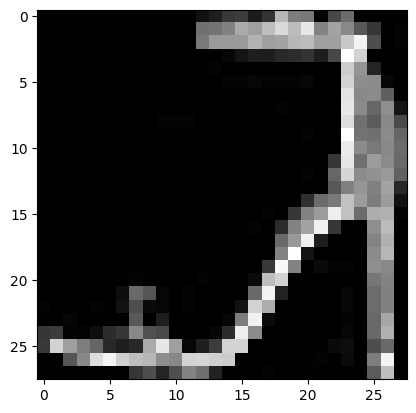

Prediction: Shirt
Label: Shirt


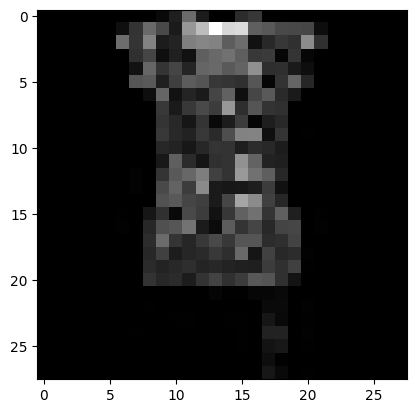

Prediction: T-shirt/top
Label: T-shirt/top


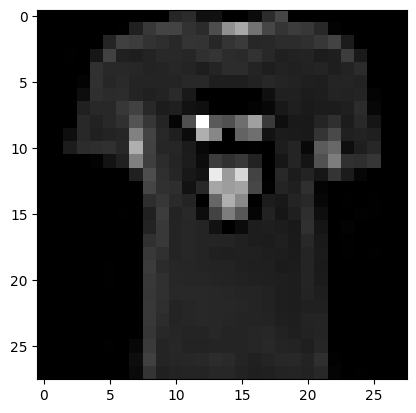

Prediction: Trouser
Label: Trouser


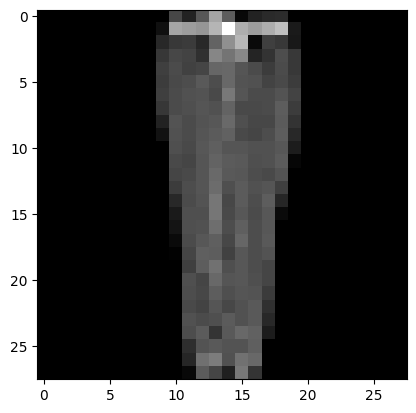

In [54]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(50, W1, b1, W2, b2)

Prediction: Bag
Label: Bag


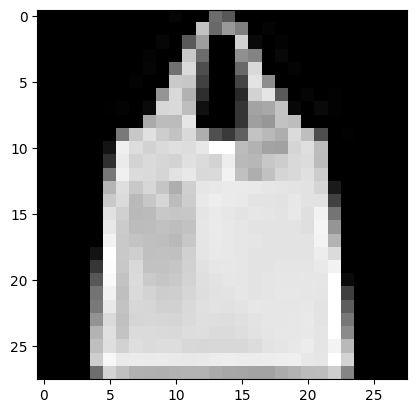

Prediction: Pullover
Label: Pullover


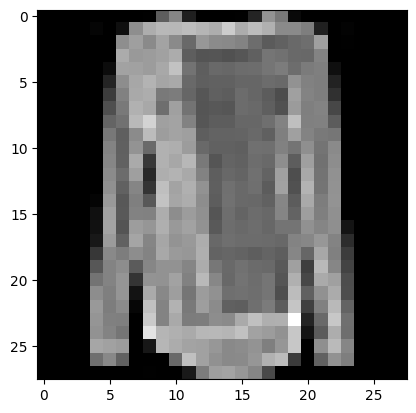

Prediction: Sneaker
Label: Sneaker


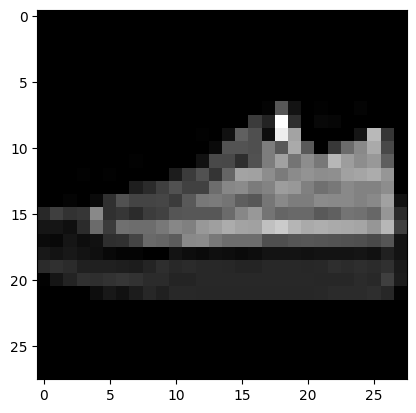

Prediction: Trouser
Label: Trouser


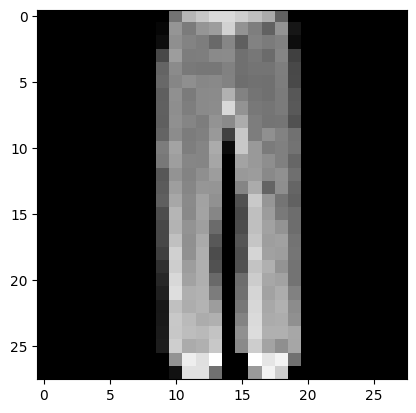

In [56]:
test_prediction(60, W1, b1, W2, b2)
test_prediction(100, W1, b1, W2, b2)
test_prediction(250, W1, b1, W2, b2)
test_prediction(333, W1, b1, W2, b2)

It can be seen that, by shuffling the training data and retraining the model with different subsets, the accuracy greatly increases.  
However, this would require a third subset: 
* one for trainig
* one for testing
* one for validation

This is because by shuffling the dataset, we are using the full dataset, which means that the test dataset has also been used for training.  
By reserving a part of the dataset for validation, and not allowing this subset to be shuffled, it could be used to make a final validation on the accuracy of the NN. 

In [59]:
validation = data[0:200]
data = data[201:]

In [60]:
m, n = data.shape

In [ ]:
# Careful when executing this cell, as it takes some time to fully execute
num_hidden_neurons = 1000
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.70, 1000)
for i in range(10):
    np.random.shuffle(data) # shuffle before splitting into dev and training sets
    
    data_dev = data[0:400].T
    Y_dev = data_dev[-1]
    X_dev = data_dev[0:n-1]
    X_dev = X_dev / 255.
    
    data_train = data[400:m].T
    Y_train = data_train[-1]
    X_train = data_train[0:n-1]
    X_train = X_train / 255.
    W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.70, 1000, W1, b1, W2, b2)

In [63]:
Y_valid = validation[-1]
X_valid = validation[0:199]
X_valid = X_valid / 255.

In [64]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

1.0

Prediction: Trouser
Label: Trouser


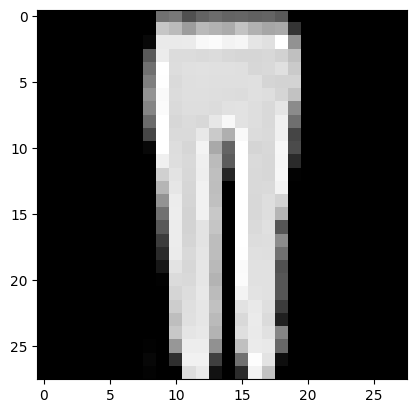

Prediction: Sneaker
Label: Sneaker


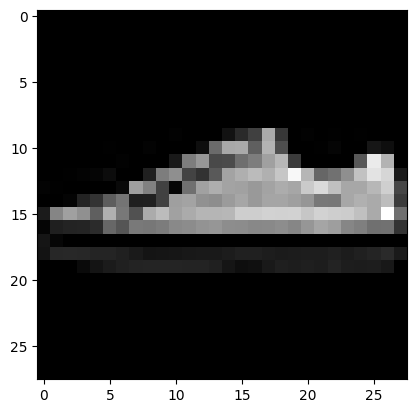

Prediction: Trouser
Label: Trouser


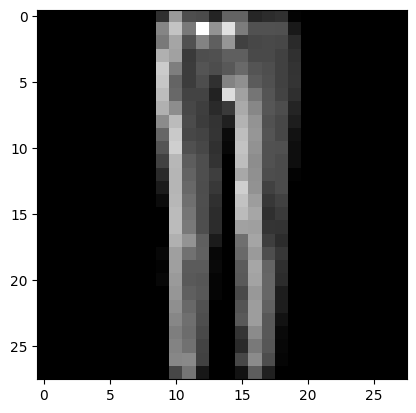

Prediction: Trouser
Label: Trouser


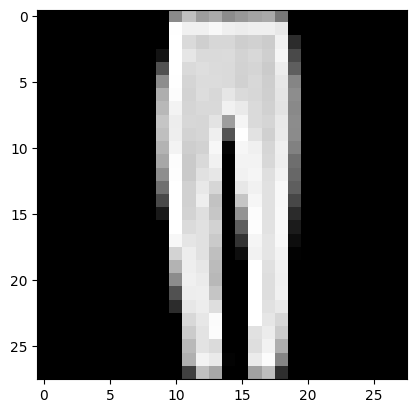

In [65]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(50, W1, b1, W2, b2)

Prediction: Sneaker
Label: Sneaker


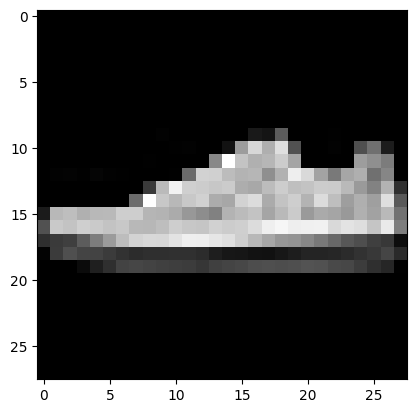

Prediction: T-shirt/top
Label: T-shirt/top


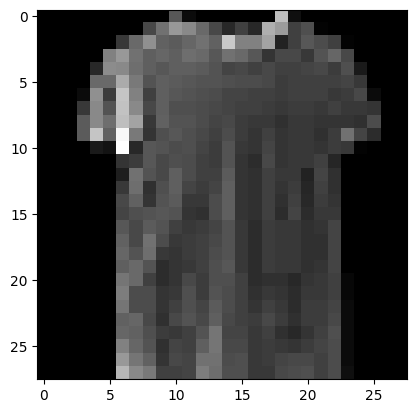

Prediction: Bag
Label: Bag


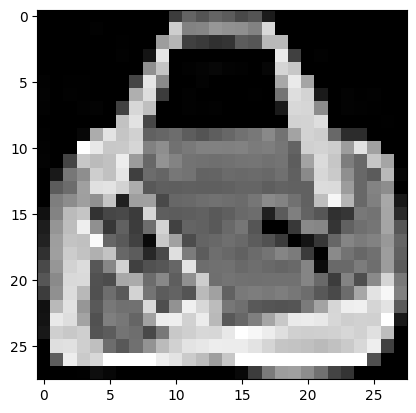

Prediction: Sneaker
Label: Sneaker


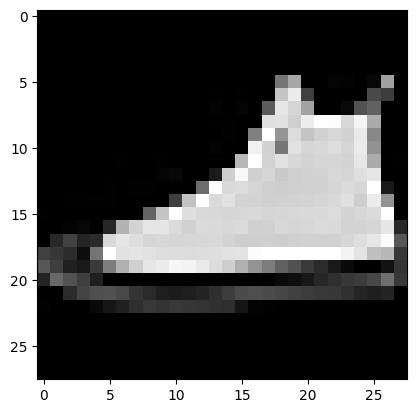

In [66]:
test_prediction(60, W1, b1, W2, b2)
test_prediction(100, W1, b1, W2, b2)
test_prediction(250, W1, b1, W2, b2)
test_prediction(333, W1, b1, W2, b2)

It can be seen that, even after reserving a subset of the data for a validation set, the accuracy is still very high.  
Therefore, we have maximized the accuracy that this simple NN can obtain.  